<a href="https://colab.research.google.com/github/omtikone/My-Application/blob/master/Jyoti_of_Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Covid-19 Detection using Convolutional Neural Network VGG16 Model.**

**Importing necessary libraries**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Activation,Dense, Flatten, Dropout, concatenate
from sklearn.utils import shuffle

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Function for loading images and preprocessing it**

In [3]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

Loading images

In [5]:
covid_images_path = "/content/drive/MyDrive/data/Covid"
non_covid_images_path = "/content/drive/MyDrive/data/Normal"

covid_images, covid_labels = load_images(covid_images_path, 1)  # 1 for COVID-19
non_covid_images, non_covid_labels = load_images(non_covid_images_path, 0)  # 0 for Normal

Concatenating the data and spliting the data into train test split

In [6]:
images = np.concatenate((covid_images, non_covid_images), axis=0)
labels = np.concatenate((covid_labels, non_covid_labels), axis=0)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Loading the VGG 16 model without top layers

In [7]:
input_tensor = Input(shape = input_shape)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape,input_tensor=input_tensor)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Freeze the convolutional model

In [8]:
for layer in base_model.layers:
    layer.trainable = False

### **VGG16**

In [9]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,8

 Total params: 14,789,121 (56.42 MB)

 Trainable params: 74,433 (290.75 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 274s 55s/step - accuracy: 0.5254 - loss: 1.5043 - val_accuracy: 0.7603 - val_loss: 0.5521
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 268s 56s/step - accuracy: 0.5627 - loss: 0.9922 - val_accuracy: 0.8182 - val_loss: 0.5026
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 322s 55s/step - accuracy: 0.6002 - loss: 0.8913 - val_accuracy: 0.8512 - val_loss: 0.4543
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 274s 57s/step - accuracy: 0.6514 - loss: 0.7222 - val_accuracy: 0.8512 - val_loss: 0.4246
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 316s 55s/step - accuracy: 0.6412 - loss: 0.6898 - val_accuracy: 0.8430 - val_loss: 0.4297


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step - accuracy: 0.8457 - loss: 0.4226

Loss: 0.42, Accuracy: 85.12%


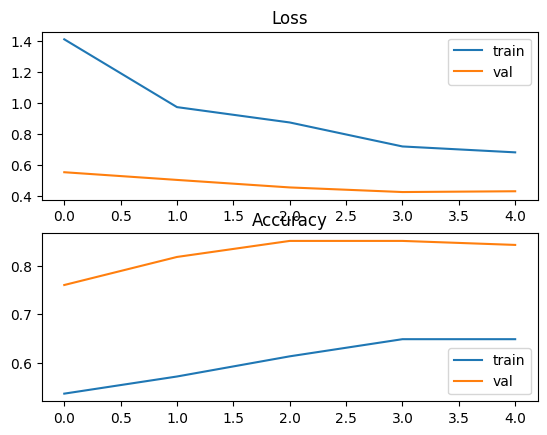

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=120,callbacks=[early_stopping])
y_preds = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 13s/step
Accuracy 0.8512396694214877
Precision: 0.8519905729937077
Recall: 0.8512396694214877
F1-score: 0.8513823945193563
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        56
           1       0.87      0.85      0.86        65

    accuracy                           0.85       121
   macro avg       0.85      0.85      0.85       121
weighted avg       0.85      0.85      0.85       121



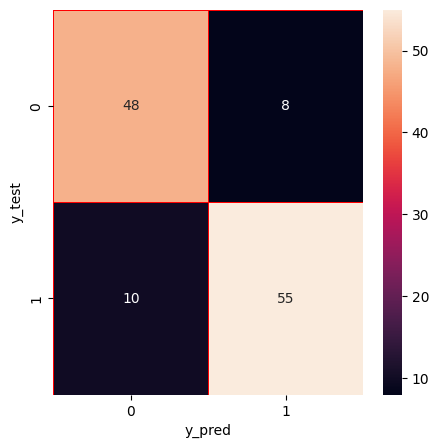

In [11]:
y_preds = model.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

Evaluating the results

In [12]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [13]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Prediction: Normal


In [14]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Prediction: Normal


### **INCEPTIONV3**

In [15]:
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape,input_tensor=input_tensor)
x1 = base_model1.output
x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
x1 = tf.keras.layers.Dense(64, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(256, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(64, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(32, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)


predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model1.input, outputs=predictions)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


16/16 ━━━━━━━━━━━━━━━━━━━━ 207s 10s/step - accuracy: 0.5608 - loss: 0.7141 - val_accuracy: 0.5372 - val_loss: 173.8983
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 200s 10s/step - accuracy: 0.6716 - loss: 0.6273 - val_accuracy: 0.5372 - val_loss: 28469.0605
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 199s 10s/step - accuracy: 0.9381 - loss: 0.4626 - val_accuracy: 0.5372 - val_loss: 111459.1484
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 198s 10s/step - accuracy: 0.9470 - loss: 0.4076 - val_accuracy: 0.5372 - val_loss: 6649363.5000
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 162s 10s/step - accuracy: 0.8164 - loss: 0.6390 - val_accuracy: 0.5372 - val_loss: 795.7054


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,018,529 (83.99 MB)

 Trainable params: 21,984,097 (83.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 213s 32s/step - accuracy: 0.8490 - loss: 0.5633 - val_accuracy: 0.5372 - val_loss: 51458.5703
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 193s 32s/step - accuracy: 0.9217 - loss: 0.4491 - val_accuracy: 0.5372 - val_loss: 14957.9648
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 201s 32s/step - accuracy: 0.9519 - loss: 0.3527 - val_accuracy: 0.5372 - val_loss: 4256.5967
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 167s 32s/step - accuracy: 0.9720 - loss: 0.3171 - val_accuracy: 0.5372 - val_loss: 3382.8699
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 166s 32s/step - accuracy: 0.9426 - loss: 0.3466 - val_accuracy: 0.5372 - val_loss: 1471.3132


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5534 - loss: 1363.8781

Loss: 1471.31, Accuracy: 53.72%


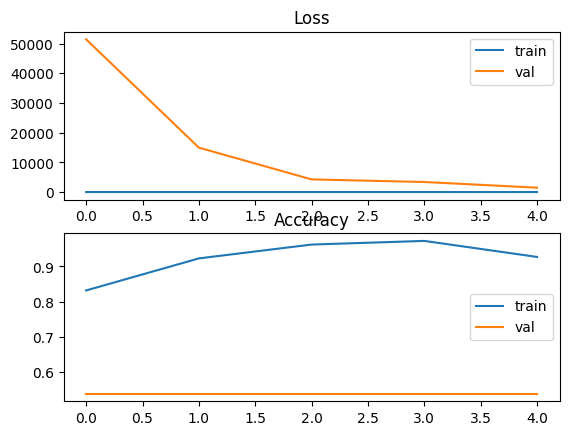

In [16]:
history = model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model1.summary()
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=120,callbacks=[early_stopping])
y_preds = model1.predict(X_test)
loss, accuracy = model1.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [17]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Resize to (224, 224)
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy 0.5371900826446281
Precision: 0.2885731848917424
Recall: 0.5371900826446281
F1-score: 0.3754554341064605
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.54      1.00      0.70        65

    accuracy                           0.54       121
   macro avg       0.27      0.50      0.35       121
weighted avg       0.29      0.54      0.38       121



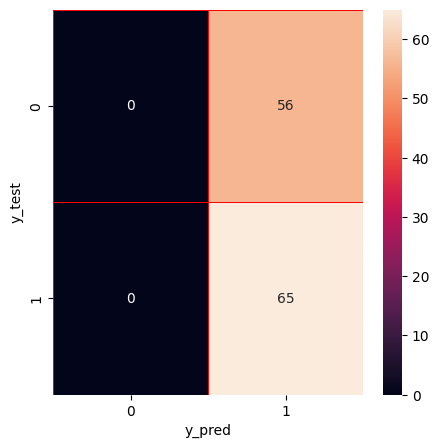

In [18]:
y_preds = model1.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [19]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model1.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [20]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Prediction: COVID-19


In [21]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction: COVID-19


### **InceptionV3 (Changes)**

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 63s 14s/step - accuracy: 0.4956 - loss: 2.8750 - val_accuracy: 0.5950 - val_loss: 0.6384
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 13s/step - accuracy: 0.5069 - loss: 1.6359 - val_accuracy: 0.8347 - val_loss: 0.6429
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.5722 - loss: 1.3687 - val_accuracy: 0.5455 - val_loss: 0.6396
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.5537 - loss: 1.2195 - val_accuracy: 0.7190 - val_loss: 0.5941
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 13s/step - accuracy: 0.5844 - loss: 0.9980 - val_accuracy: 0.8347 - val_loss: 0.5290
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8266 - loss: 0.5343
Test Loss: 0.5290, Test Accuracy: 0.8347


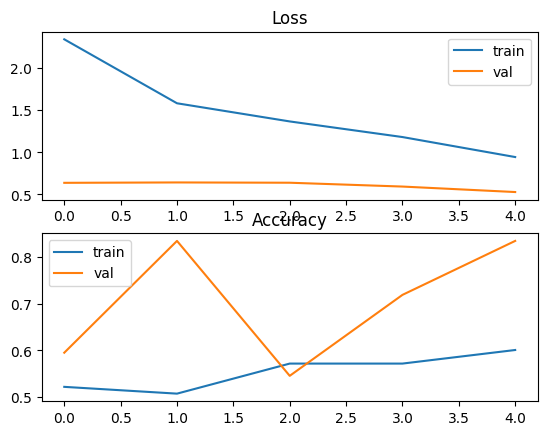

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
Precision: 0.7711, Sensitivity (Recall): 0.9846


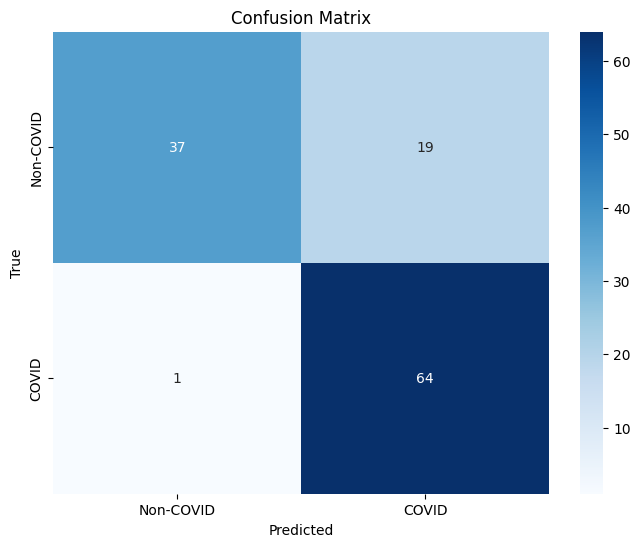

In [23]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model1.fit(X_train, y_train, epochs=5, batch_size=124, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3 (6 epochs, 124 batch size)**

Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 13s/step - accuracy: 0.5470 - loss: 3.5094 - val_accuracy: 0.4959 - val_loss: 0.7141
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 13s/step - accuracy: 0.5131 - loss: 2.6200 - val_accuracy: 0.6364 - val_loss: 0.5607
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.5057 - loss: 2.1306 - val_accuracy: 0.4711 - val_loss: 0.6377
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 13s/step - accuracy: 0.5402 - loss: 1.7431 - val_accuracy: 0.4793 - val_loss: 0.6104
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.5794 - loss: 1.2376 - val_accuracy: 0.6198 - val_loss: 0.5744
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.5816 - loss: 0.9800 - val_accuracy: 0.8760 - val_loss: 0.5123
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8921 - loss: 0.5157
Test Loss: 0.5123, Test Accuracy: 0.8760


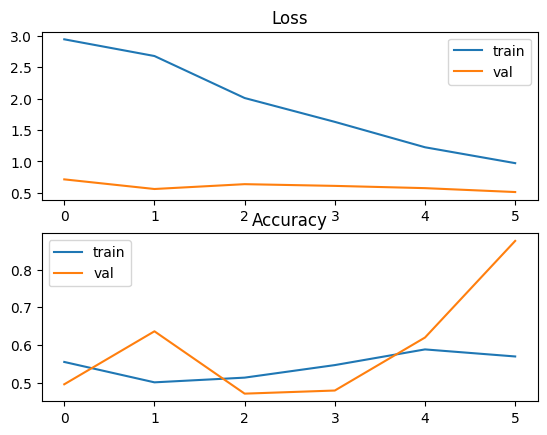

3/4 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
Precision: 0.9310, Sensitivity (Recall): 0.8308


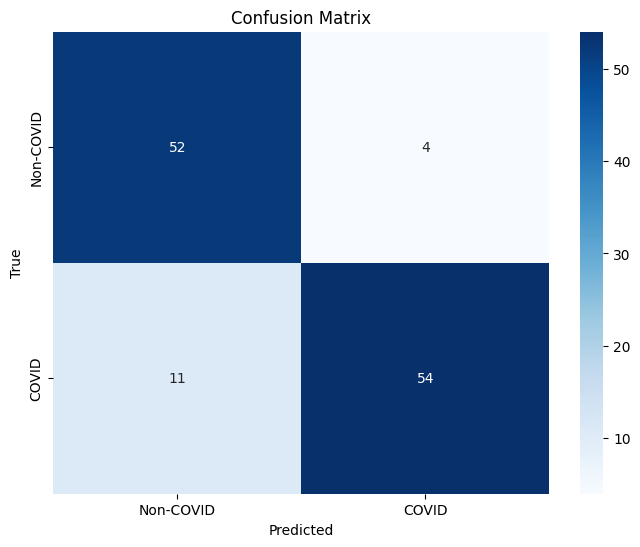

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 6,  batch_size=124, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3(6 epochs, 64 batch size)**

Epoch 1/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4999 - loss: 5.2384 - val_accuracy: 0.5289 - val_loss: 0.7024
Epoch 2/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.5442 - loss: 2.3093 - val_accuracy: 0.5537 - val_loss: 0.6471
Epoch 3/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.5351 - loss: 1.7158 - val_accuracy: 0.6860 - val_loss: 0.6078
Epoch 4/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.5572 - loss: 1.1957 - val_accuracy: 0.6860 - val_loss: 0.5917
Epoch 5/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.6506 - loss: 0.7938 - val_accuracy: 0.8099 - val_loss: 0.4275
Epoch 6/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.6865 - loss: 0.7470 - val_accuracy: 0.8678 - val_loss: 0.3365
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8606 - loss: 0.3355
Test Loss: 0.3365, Test Accuracy: 0.8678


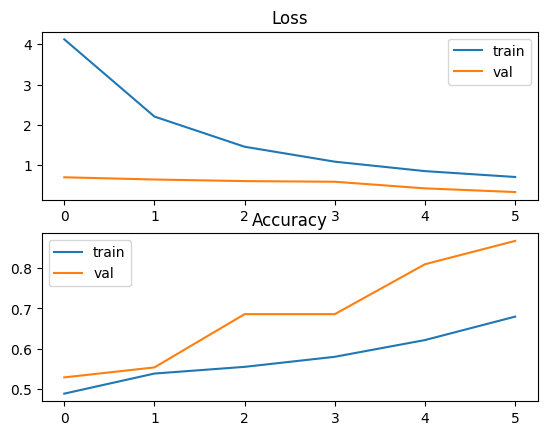

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
Precision: 0.8182, Sensitivity (Recall): 0.9692


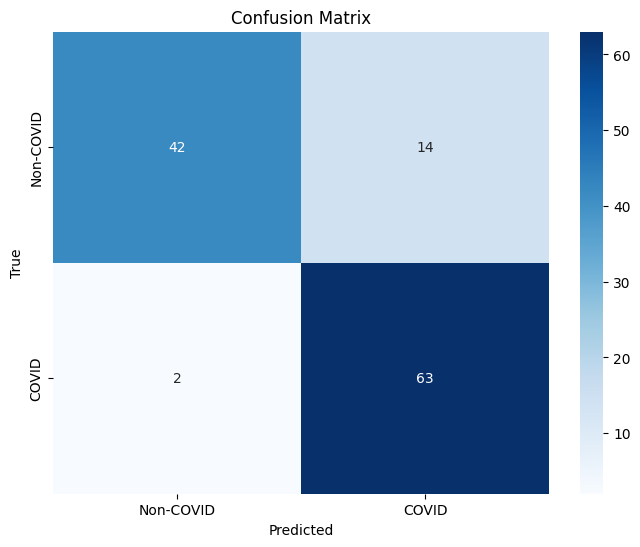

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 6,  batch_size=64, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3(9 epochs, 32 batch size)**

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.5023 - loss: 3.3360 - val_accuracy: 0.8099 - val_loss: 0.4462
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.5106 - loss: 2.7502 - val_accuracy: 0.8182 - val_loss: 0.5134
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5269 - loss: 2.1229 - val_accuracy: 0.8595 - val_loss: 0.4072
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5880 - loss: 1.2847 - val_accuracy: 0.7934 - val_loss: 0.5675
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.5821 - loss: 1.3083 - val_accuracy: 0.8430 - val_loss: 0.3903
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.6208 - loss: 0.9562 - val_accuracy: 0.8926 - val_loss: 0.4167
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.6488 - loss: 0.8588 - val_accuracy: 0.8843 - val_loss: 0.4115
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7031 - loss: 0.6370 - val_accuracy: 0.8843 - val_loss: 0.3850


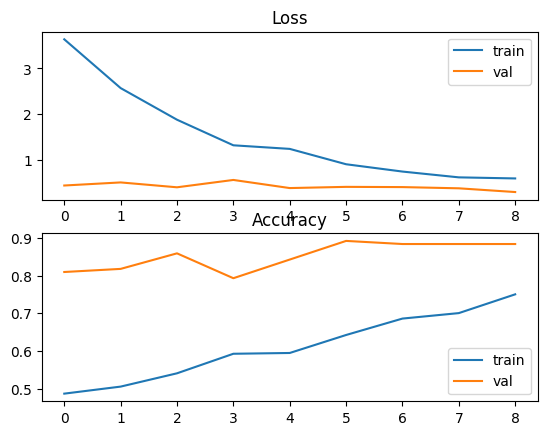

4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
Precision: 0.8400, Sensitivity (Recall): 0.9692, F1-Score: 0.9000


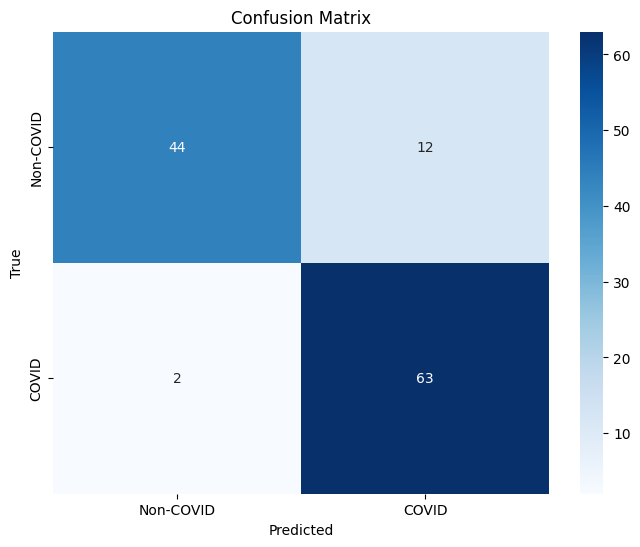

In [30]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 9,  batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}, F1-Score: {f1:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **VGG19**

In [31]:
base_model2 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x2 = base_model2.output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)
x2 = tf.keras.layers.Dense(256, activation='relu')(x2)
x2 = tf.keras.layers.Dropout(0.5)(x2)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x2)

model2 = Model(inputs=base_model2.input, outputs=predictions)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,155,969 (76.89 MB)

 Trainable params: 20,155,969 (76.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 911s 56s/step - accuracy: 0.5229 - loss: 71.0000 - val_accuracy: 0.4628 - val_loss: 0.7144
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 889s 56s/step - accuracy: 0.5530 - loss: 0.7024 - val_accuracy: 0.5372 - val_loss: 0.6929
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 921s 56s/step - accuracy: 0.4894 - loss: 0.6969 - val_accuracy: 0.4628 - val_loss: 0.6932
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 925s 56s/step - accuracy: 0.4522 - loss: 0.6967 - val_accuracy: 0.5124 - val_loss: 0.6915
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 921s 56s/step - accuracy: 0.4598 - loss: 0.6947 - val_accuracy: 0.7273 - val_loss: 0.6921
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 918s 56s/step - accuracy: 0.5476 - loss: 0.6935 - val_accuracy: 0.8017 - val_loss: 0.6908
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 889s 56s/step - accuracy: 0.5519 - loss: 0.6906 - val_accuracy: 0.6942 - val_loss: 0.6914
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 888s 56s/step - accuracy: 0.4902 - loss: 0.6924 - val_accuracy: 0.5372 - 

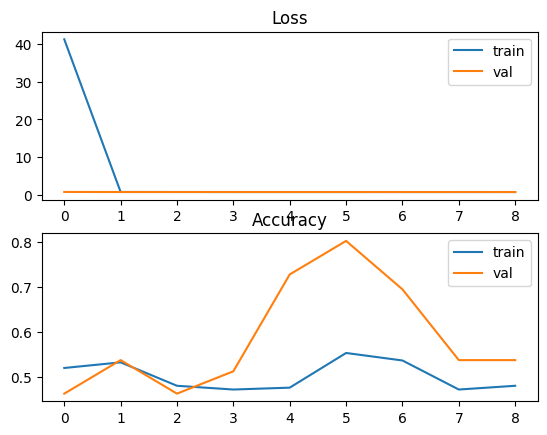

In [32]:
## history = model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model2.summary()
history=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9,batch_size=32,callbacks=[early_stopping])
y_preds = model2.predict(X_test)
loss, accuracy = model2.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 15s/step
Accuracy 0.5371900826446281
Precision: 0.2885731848917424
Recall: 0.5371900826446281
F1-score: 0.3754554341064605
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.54      1.00      0.70        65

    accuracy                           0.54       121
   macro avg       0.27      0.50      0.35       121
weighted avg       0.29      0.54      0.38       121



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

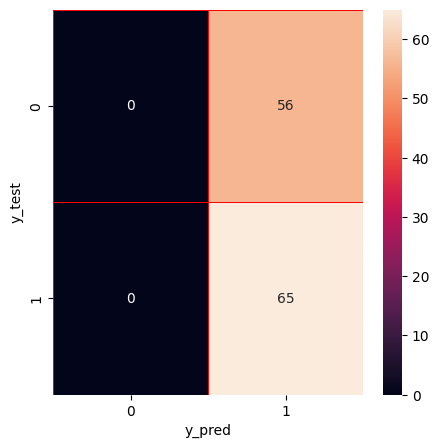

In [33]:
y_preds = model2.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [34]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model2.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [35]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
Prediction: COVID-19


In [36]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
Prediction: COVID-19


### **Resnet 50**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.6878 - loss: 0.7283 - val_accuracy: 0.8760 - val_loss: 0.2597
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.8567 - loss: 0.2957 - val_accuracy: 0.9752 - val_loss: 0.0874
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.9565 - loss: 0.1106 - val_accuracy: 0.9917 - val_loss: 0.0339
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9782 - loss: 0.0620 - val_accuracy: 0.9917 - val_loss: 0.0265
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.9915 - loss: 0.0345 - val_accuracy: 0.9917 - val_loss: 0.0239
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.9979 - loss: 0.0221 - val_accuracy: 0.9917 - val_loss: 0.0303
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.9990 - loss: 0.0152 - val_accuracy: 0.9917 - val_loss: 0.0219
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9970 - lo

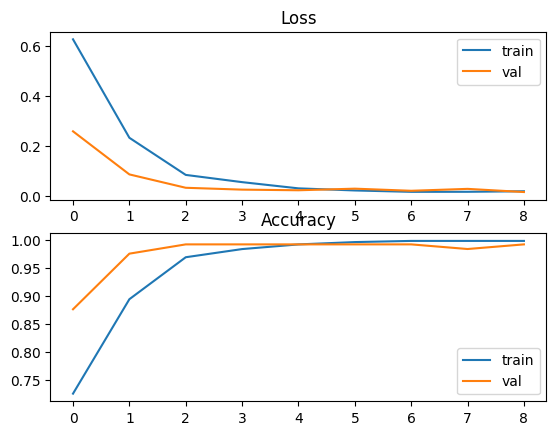

4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step
Precision: 1.0000, Sensitivity (Recall): 0.9846


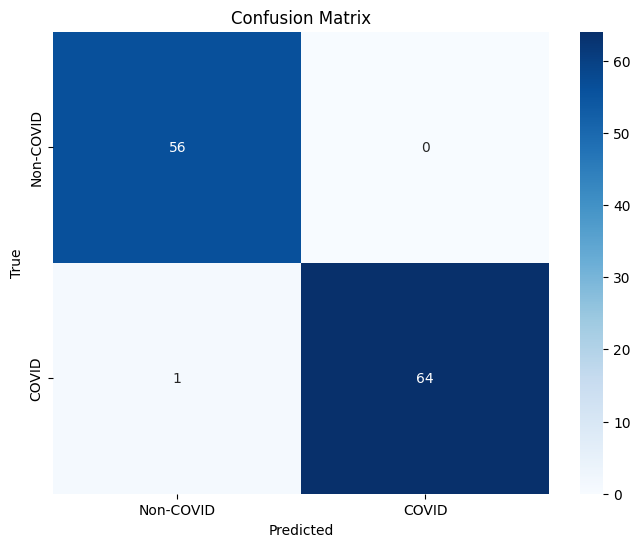

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

base_model3 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model3.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model3.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


# Calculate precision and sensitivity
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9922
